In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans

# Ensure plots display correctly in notebooks
%matplotlib inline


In [4]:
# Load the dataset
df = pd.read_csv('thyroidDF.csv')

# Fill missing values (using forward fill)
df.fillna(method='ffill', inplace=True)

# Convert categorical data to numeric values
df['sex'] = df['sex'].map({'M': 0, 'F': 1})

# Check and convert boolean columns with 't' and 'f' values
bool_columns = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 
                'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 
                'query_hypothyroid', 'query_hyperthyroid', 'lithium', 
                'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 
                'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 
                'TBG_measured']

# Map 't' to 1 and 'f' to 0, fill any missing values with 0, then convert to int
for col in bool_columns:
    df[col] = df[col].replace({'t': 1, 'f': 0}).fillna(0).astype(int)

# Display the first few rows to verify
df.head()


C:\Users\Dell\AppData\Local\Temp\ipykernel_7176\1268982666.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7176\1268982666.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'t': 1, 'f': 0}).fillna(0).astype(int)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7176\1268982666.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,1,0,0,0,0,0,0,0,1,...,NaN,0,NaN,0,NaN,0,NaN,other,-,840801013
1,29,1,0,0,0,0,0,0,0,0,...,128.0,0,NaN,0,NaN,0,NaN,other,-,840801014
2,41,1,0,0,0,0,0,0,0,0,...,128.0,0,NaN,0,NaN,1,11.0,other,-,840801042
3,36,1,0,0,0,0,0,0,0,0,...,128.0,0,NaN,0,NaN,1,26.0,other,-,840803046
4,32,1,0,0,0,0,0,0,0,0,...,128.0,0,NaN,0,NaN,1,36.0,other,S,840803047


In [5]:
# Create the autoimmune risk indicator
df['autoimmune_risk'] = ((df['goitre'] == 1) | 
                         (df['query_hypothyroid'] == 1) | 
                         (df['query_hyperthyroid'] == 1) | 
                         (df['TSH'] > 4.5)).astype(int)

# Check the distribution of autoimmune risk
df['autoimmune_risk'].value_counts()


autoimmune_risk
0    6832
1    2340
Name: count, dtype: int64

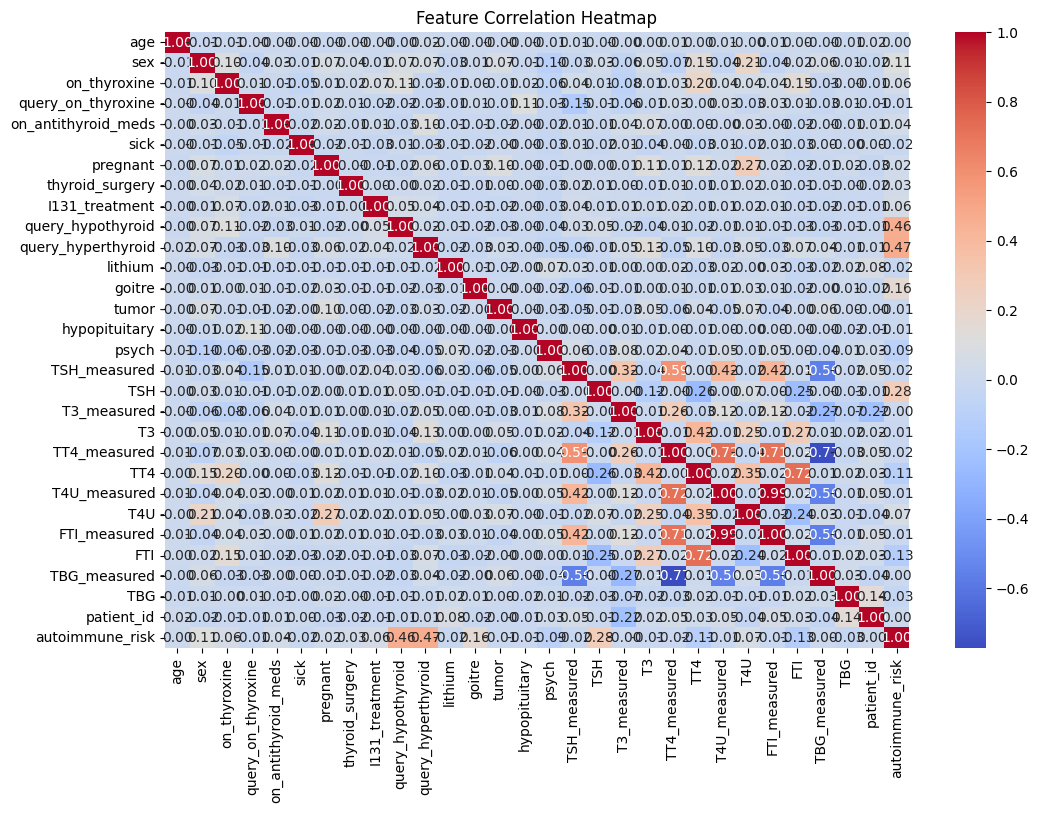

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Generate the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


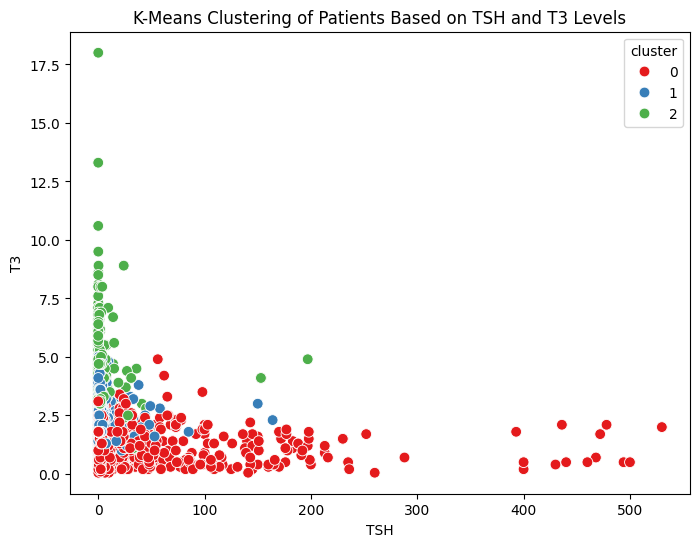

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering (you can change based on your analysis)
cluster_features = df[['TSH', 'T3', 'TT4', 'T4U']]

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
cluster_features_imputed = imputer.fit_transform(cluster_features)

# Standardize the features
scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features_imputed)

# Apply K-means clustering (3 clusters as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(cluster_features_scaled)

# Plot clusters based on TSH and T3 levels
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TSH', y='T3', hue='cluster', palette='Set1', s=60)
plt.title('K-Means Clustering of Patients Based on TSH and T3 Levels')
plt.show()


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Handle NaN values by imputing the mean
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the training and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8630087209302325
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      2026
           1       0.96      0.50      0.66       726

    accuracy                           0.86      2752
   macro avg       0.90      0.75      0.79      2752
weighted avg       0.88      0.86      0.85      2752




Feature Importance:
               Feature  Coefficient
2                  TSH    12.384364
6               goitre     0.819272
1                  sex     0.280524
3                   T3     0.229811
7         on_thyroxine     0.122525
8  on_antithyroid_meds     0.115352
4                  TT4     0.078978
0                  age     0.039873
5                  FTI     0.009203


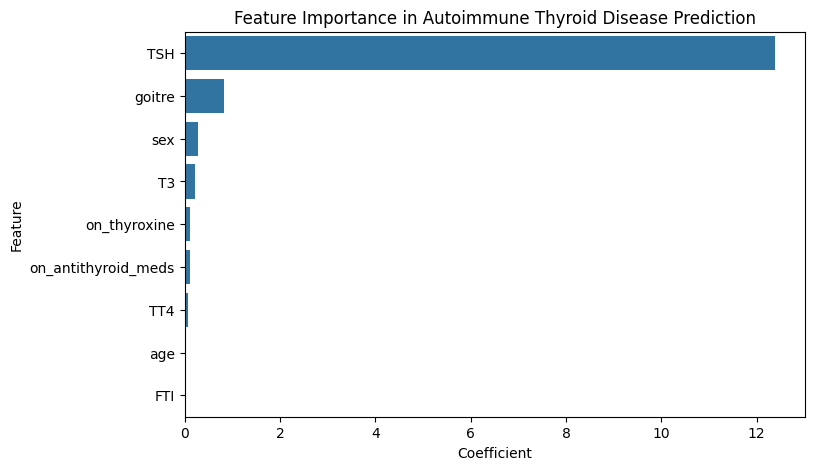

In [13]:
# Extract feature coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Display feature importance
print("\nFeature Importance:")
print(coefficients)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance in Autoimmune Thyroid Disease Prediction')
plt.show()


In [14]:
# Display key insights
print(f"Total Patients: {len(df)}")
print(f"Identified Autoimmune Cases: {df['autoimmune_risk'].sum()}")
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Total Patients: 9172
Identified Autoimmune Cases: 2340
Model Accuracy: 0.86


In [17]:
# Load both datasets (update the file paths accordingly)
thyroid_data = pd.read_csv('thyroidDF.csv')  # Update path if needed
cardio_data = pd.read_csv('cardio_train.csv', sep=';')  # Check if the file is in the correct location

# Display the first few rows of each dataset to confirm loading
print("Thyroid Dataset:")
print(thyroid_data.head())

print("\nCardiovascular Dataset:")
print(cardio_data.head())


Thyroid Dataset:
   age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...    TT4 T4U_measured  \
0               f              f                 t  ...    NaN            f   
1               f              f                 f  ...  128.0            f   
2               f              f                 f  ...    NaN            f   
3               f              f                 f  ...    NaN            f   
4               f              f                 f  ...    NaN            f   

  T4U FTI_measured FTI TBG_

In [18]:
# Check for missing values in both datasets
print("Missing values in Thyroid Dataset:\n", thyroid_data.isnull().sum())
print("\nMissing values in Cardiovascular Dataset:\n", cardio_data.isnull().sum())

# Handle missing values if necessary
# For example, filling missing values in the thyroid dataset
# thyroid_data.fillna(thyroid_data.mean(), inplace=True)  # Uncomment if you want to fill NaNs

# Ensure relevant columns are numeric for correlation analysis
# Here we assume relevant columns exist, adjust accordingly


Missing values in Thyroid Dataset:
 age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

Missing values in Cardiovascular Dataset:
 id             0
age            0
gende

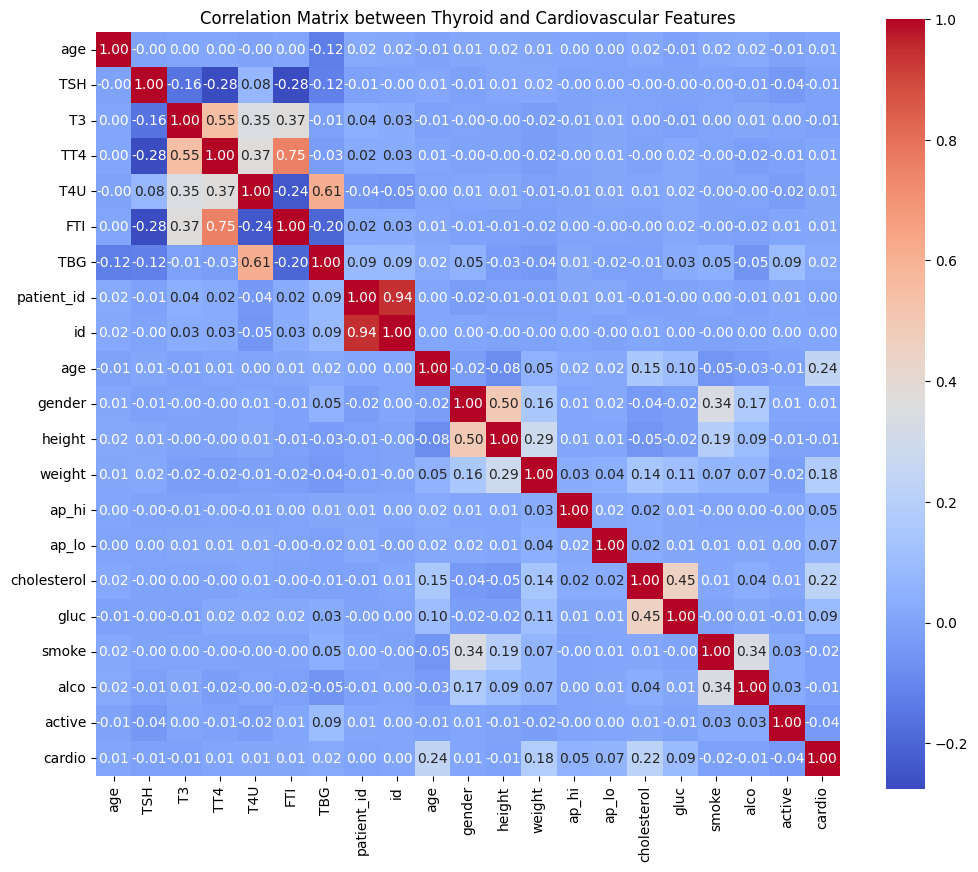

In [19]:
# Perform correlation analysis
# Here, replace 'your_thyroid_feature' and 'your_cardio_feature' with actual column names for analysis

# Example: Assuming there is a column 'T3' in thyroid_data and 'cardio' in cardio_data
thyroid_features = thyroid_data.select_dtypes(include=[np.number])
cardio_features = cardio_data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = pd.concat([thyroid_features, cardio_features], axis=1).corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix between Thyroid and Cardiovascular Features')
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [5]:
# Load datasets
thyroid_data = pd.read_csv('thyroidDF.csv')  # Thyroid dataset
cardio_data = pd.read_csv('cardio_train.csv', sep=';')  # Cardiovascular dataset
cancer_data = pd.read_csv('cancer_data.csv')  # Cancer dataset


In [8]:
# Select relevant columns for thyroid dataset
thyroid_features = thyroid_data[['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 
                                 'on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 
                                 'thyroid_surgery', 'I131_treatment', 'goitre', 'tumor', 
                                 'hypopituitary', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'patient_id']]

# Select relevant columns for cardiovascular dataset
cardio_features = cardio_data[['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 
                               'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]

# Select relevant columns for cancer dataset
cancer_features = cancer_data[['Age', 'Gender', 'Smoking', 
                               'Thyroid Function', 'Physical Examination', 'Adenopathy', 
                               'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 
                               'Response', 'Recurred']]


In [11]:
from sklearn.model_selection import train_test_split

# Assuming 'cancer_data' is your DataFrame containing the cancer dataset
# Select features and target
X_cancer = cancer_data[['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Thyroid Function', 'Physical Examination', 
                        'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']]
y_cancer = cancer_data['Recurred']  # Assuming 'Recurred' is the target column

# Split into training and test sets
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)


In [13]:
# Cardio dataset
X_cardio = cardio_data[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y_cardio = cardio_data['cardio']

X_train_cardio, X_test_cardio, y_train_cardio, y_test_cardio = train_test_split(X_cardio, y_cardio, test_size=0.2, random_state=42)

# Select features
X_thyroid = thyroid_data[['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 
                          'on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 
                          'thyroid_surgery', 'I131_treatment', 'goitre', 'tumor', 
                          'hypopituitary', 'query_hypothyroid', 'query_hyperthyroid', 'lithium']]

# Select target (assuming the target is 'target' or similar)
y_thyroid = thyroid_data['target']  # Replace 'target' with the actual column name for your target


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [3]:
# Load the datasets
thyroid_data = pd.read_csv('thyroidDF.csv')
cardio_data = pd.read_csv('cardio_train.csv', sep=';')
cancer_data = pd.read_csv('cancer_data.csv')

# Select relevant features from each dataset
thyroid_features = thyroid_data[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 
                                 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 
                                 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 
                                 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'patient_id', 'target']]

cardio_features = cardio_data[['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 
                               'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]

cancer_features = cancer_data[['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 
                               'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 
                               'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']]


In [8]:
# Ensure 'age' and 'gender/sex' columns are of the same data type in both datasets
thyroid_data['age'] = thyroid_data['age'].astype(int)
thyroid_data['sex'] = thyroid_data['sex'].astype(str)  # Convert 'sex' to string type
cardio_data['age'] = cardio_data['age'].astype(int)
cardio_data['gender'] = cardio_data['gender'].astype(str)  # Convert 'gender' to string type

# Select relevant features from the thyroid dataset
thyroid_features = thyroid_data[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 
                                 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 
                                 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 
                                 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 
                                 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'patient_id']]

# Select relevant features from the cardiovascular dataset
cardio_features = cardio_data[['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 
                               'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]

# Ensure column names are consistent across datasets
cardio_features = cardio_features.rename(columns={'gender': 'sex'})

# Merge thyroid and cardiovascular datasets on 'age' and 'sex'
merged_data = pd.merge(thyroid_features, cardio_features, on=['age', 'sex'], how='inner')

# Ensure 'age' and 'gender' columns are consistent in cancer data for merging
cancer_data['age'] = cancer_data['Age'].astype(int)
cancer_data['gender'] = cancer_data['Gender'].astype(str)  # Ensure consistency in type

# Select relevant features from cancer dataset and rename for consistency
cancer_features = cancer_data[['age', 'gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 
                               'Thyroid Function', 'Physical Examination', 'Adenopathy', 
                               'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 
                               'Response', 'Recurred']]
cancer_features.rename(columns={'gender': 'sex'}, inplace=True)

# Merge the resulting dataset with cancer data on 'age' and 'sex'
merged_data = pd.merge(merged_data, cancer_features, on=['age', 'sex'], how='inner')


C:\Users\Dell\AppData\Local\Temp\ipykernel_12584\594705518.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_features.rename(columns={'gender': 'sex'}, inplace=True)


In [11]:
# Handling missing values in merged_data
for column in merged_data.columns:
    # If the column is categorical (object), fill with mode
    if merged_data[column].dtype == 'object':
        # Check if mode is available, otherwise skip or use a fallback
        if not merged_data[column].mode().empty:
            merged_data[column].fillna(merged_data[column].mode()[0], inplace=True)
        else:
            # Optionally, specify a fallback value if mode is empty
            merged_data[column].fillna('Unknown', inplace=True)
    else:
        # If the column is numerical, fill with median
        merged_data[column].fillna(merged_data[column].median(), inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_12584\710524025.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[column].fillna(merged_data[column].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12584\710524025.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [13]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns in merged_data that need encoding
categorical_cols = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 
                    'sick', 'pregnant', 'thyroid_surgery', 'query_hypothyroid', 
                    'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'psych', 
                    'smoke', 'alco', 'active', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 
                    'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 
                    'Focality', 'Response', 'Recurred']

# Initialize label encoders and apply encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    merged_data[col] = le.fit_transform(merged_data[col])
    label_encoders[col] = le  # Store each encoder for future use if needed


In [23]:
# Print column names to verify
print("Cancer Data Columns:", cancer_data.columns)


Cancer Data Columns: Index(['age', 'sex', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred',
       'age', 'gender'],
      dtype='object')


In [30]:
# Fill missing values in merged_data
for column in merged_data.columns:
    if merged_data[column].dtype == 'object':  # For categorical columns
        # Calculate the mode (most frequent value) if it exists
        if not merged_data[column].mode().empty:
            mode_value = merged_data[column].mode()[0]
            # Fill missing values with the mode
            merged_data[column].fillna(mode_value, inplace=True)
        else:
            # Fallback to a placeholder if mode is not available
            merged_data[column].fillna('Unknown', inplace=True)
    else:  # For numerical columns
        # Calculate the median (middle value) of the column
        median_value = merged_data[column].median()
        # Fill missing values with the median
        merged_data[column].fillna(median_value, inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_12584\2432075262.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[column].fillna(median_value, inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12584\2432075262.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [34]:
# Print the column names of both datasets to see what they contain
print("Thyroid Dataset Columns:", thyroid_data.columns)
print("Cancer Dataset Columns:", cancer_data.columns)


Thyroid Dataset Columns: Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')
Cancer Dataset Columns: Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


   Age Gender on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
0   29      F            f                  f                   f    f   
1   29      F            f                  f                   f    f   
2   29      F            f                  f                   f    f   
3   29      F            f                  f                   f    f   
4   29      F            f                  f                   f    f   

  pregnant thyroid_surgery I131_treatment query_hypothyroid  ... Adenopathy  \
0        f               f              f                 t  ...         No   
1        f               f              f                 t  ...         No   
2        f               f              f                 t  ...         No   
3        f               f              f                 t  ...         No   
4        f               f              f                 t  ...         No   

    Pathology   Focality Risk    T   N   M  Stage   Response  Recurred  
0  Foll

C:\Users\Dell\AppData\Local\Temp\ipykernel_12584\2885596645.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data.fillna(correlation_data.median(), inplace=True)  # Or use dropna()


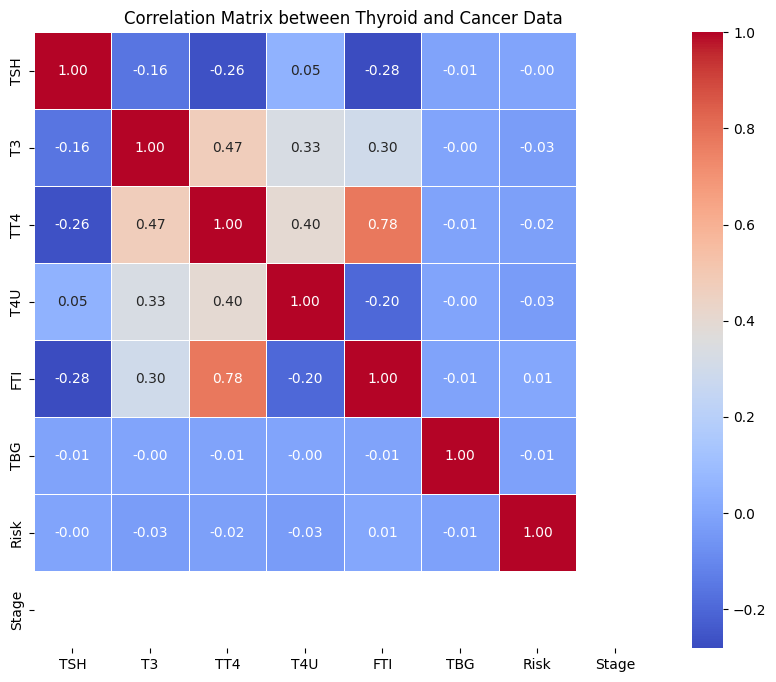

Correlation between thyroid features and cancer risk:
           TSH        T3       TT4       T4U       FTI       TBG      Risk
TSH   1.000000 -0.158268 -0.263570  0.051717 -0.281144 -0.006736 -0.004221
T3   -0.158268  1.000000  0.472238  0.330031  0.299199 -0.003693 -0.029825
TT4  -0.263570  0.472238  1.000000  0.397816  0.778337 -0.009247 -0.016815
T4U   0.051717  0.330031  0.397816  1.000000 -0.200161 -0.004652 -0.034720
FTI  -0.281144  0.299199  0.778337 -0.200161  1.000000 -0.010753  0.005285
TBG  -0.006736 -0.003693 -0.009247 -0.004652 -0.010753  1.000000 -0.011894
Risk -0.004221 -0.029825 -0.016815 -0.034720  0.005285 -0.011894  1.000000


In [36]:
import pandas as pd

# Load the datasets
thyroid_data = pd.read_csv('thyroidDF.csv')
cancer_data = pd.read_csv('cancer_data.csv')

# Standardize column names for merging (rename columns in the thyroid dataset)
thyroid_data.rename(columns={'age': 'Age', 'sex': 'Gender'}, inplace=True)

# Now we can merge on 'Age' and 'Gender' columns
merged_data = pd.merge(thyroid_data, cancer_data, on=['Age', 'Gender'], how='inner')

# Preview the merged data to ensure it worked
print(merged_data.head())

# Convert categorical columns like 'Risk' and 'Stage' to numeric (for correlation)
# Example mapping for 'Risk' column (assuming it has 'Low' and 'High' values)
risk_mapping = {'Low': 0, 'High': 1}  # Adjust the mapping as per your data
merged_data['Risk'] = merged_data['Risk'].map(risk_mapping)

# If 'Stage' has categorical values, you can map them similarly
stage_mapping = {'Stage 1': 1, 'Stage 2': 2, 'Stage 3': 3, 'Stage 4': 4}  # Adjust as needed
merged_data['Stage'] = merged_data['Stage'].map(stage_mapping)

# Handle any other categorical columns that may contain string data (if necessary)

# Select relevant columns for correlation
correlation_data = merged_data[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'Risk', 'Stage']]

# Check for missing values before correlation
print(correlation_data.isnull().sum())

# If there are missing values, you can fill them (or drop rows, depending on your approach)
correlation_data.fillna(correlation_data.median(), inplace=True)  # Or use dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Thyroid and Cancer Data')
plt.show()

# Print specific correlations between thyroid features and cancer risk
print("Correlation between thyroid features and cancer risk:")
print(correlation_data[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'Risk']].corr())


In [38]:
# Drop rows where the target variable 'Risk' is NaN
merged_data_cleaned = merged_data.dropna(subset=['Risk'])

# Redefine X and y
X = merged_data_cleaned[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']]  # Features
y = merged_data_cleaned['Risk']  # Target variable (Cancer Risk)

# Proceed with train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model as before
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [40]:
# Step 1: Ensure any NaN values in 'Risk' are filled consistently in the merged data
merged_data['Risk'] = merged_data['Risk'].fillna(merged_data['Risk'].mode()[0])

# Step 2: Define X and y after handling missing values
X = merged_data[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']]  # Features
y = merged_data['Risk']  # Target variable

# Step 3: Double-check that both X and y now have the same length
print("Length of X:", len(X))
print("Length of y:", len(y))

# Step 4: Proceed with the train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


Length of X: 29357
Length of y: 29357


RandomForestClassifier(random_state=42)

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 2: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 3: Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 4: Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9058242506811989

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      5420
         1.0       0.10      0.03      0.04       452

    accuracy                           0.91      5872
   macro avg       0.51      0.50      0.50      5872
weighted avg       0.86      0.91      0.88      5872


Confusion Matrix:
[[5307  113]
 [ 440   12]]


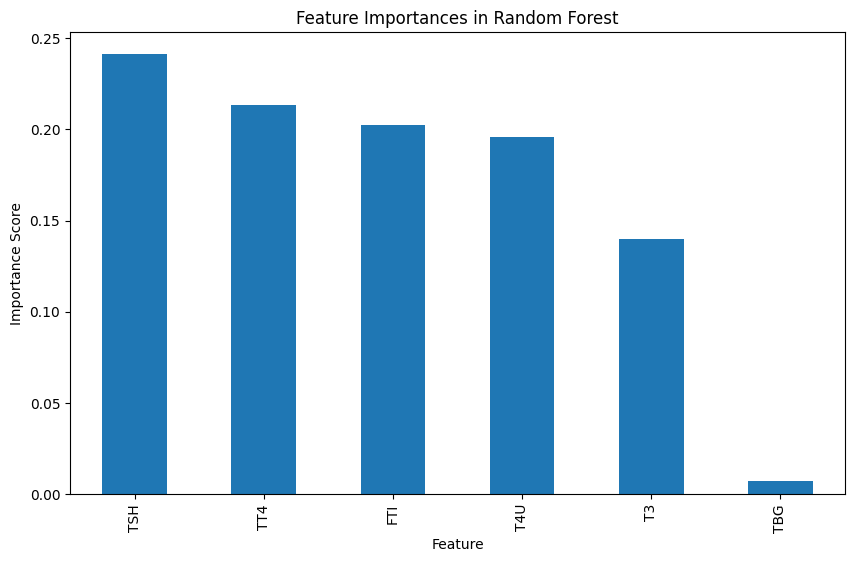

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from the Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances in Random Forest")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


In [1]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}


In [9]:
import pandas as pd

# Load the dataset
cancer_df = pd.read_csv('cancer_data.csv')

# Check the first few rows of the dataset
print(cancer_df.head())


   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0  

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('cancer_data.csv')

# Check the first few rows of the dataset
print(data.head())

# Preprocess categorical columns
label_encoder = LabelEncoder()

# Encode categorical features
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Smoking'] = label_encoder.fit_transform(data['Smoking'])
data['Hx Smoking'] = label_encoder.fit_transform(data['Hx Smoking'])
data['Hx Radiothreapy'] = label_encoder.fit_transform(data['Hx Radiothreapy'])
data['Thyroid Function'] = label_encoder.fit_transform(data['Thyroid Function'])
data['Physical Examination'] = label_encoder.fit_transform(data['Physical Examination'])
data['Adenopathy'] = label_encoder.fit_transform(data['Adenopathy'])
data['Pathology'] = label_encoder.fit_transform(data['Pathology'])
data['Focality'] = label_encoder.fit_transform(data['Focality'])
data['Stage'] = label_encoder.fit_transform(data['Stage'])
data['Response'] = label_encoder.fit_transform(data['Response'])
data['Recurred'] = label_encoder.fit_transform(data['Recurred'])
data['Risk'] = label_encoder.fit_transform(data['Risk'])  # Target variable

# Check the data again after encoding
print(data.head())


   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0  

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load and clean the dataset
df = pd.read_csv('thyroidDF.csv')  # Replace with your actual file path

# Identify categorical columns and apply label encoding
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Handle numeric columns with potential missing values
numeric_cols = ['T3', 'TT4', 'TSH']  # Add other numeric columns as needed
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Split the dataset into features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column you want to predict
y = df['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9416893732970028


In [22]:
from sklearn.metrics import classification_report

# Print a detailed classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1328
           1       0.67      0.76      0.71        21
           2       0.90      0.90      0.90        10
           3       0.00      0.00      0.00         4
           9       0.90      0.95      0.93        40
          10       0.00      0.00      0.00         1
          11       0.95      1.00      0.97        69
          12       0.00      0.00      0.00         1
          13       0.86      1.00      0.92         6
          16       0.89      0.71      0.79        82
          17       1.00      0.25      0.40        12
          18       0.96      0.97      0.97       106
          19       1.00      0.50      0.67         2
          20       0.83      0.54      0.65        28
          22       1.00      1.00      1.00        25
          24       1.00      0.83      0.91         6
          25       0.72      0.90      0.80        20
          26       0.50    

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

In [25]:
print("Thyroid Data Columns:", thyroid_df.columns)
print("Cancer Data Columns:", cancer_df.columns)


Thyroid Data Columns: Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')
Cancer Data Columns: Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


In [26]:
# Rename columns for consistency
thyroid_df.rename(columns={'sex': 'gender'}, inplace=True)
cancer_df.rename(columns={'Age': 'age', 'Gender': 'gender'}, inplace=True)


In [27]:
# Convert gender in both datasets to numeric (if not already numeric)
thyroid_df['gender'] = thyroid_df['gender'].map({'female': 0, 'male': 1})  # if in text format
cancer_df['gender'] = cancer_df['gender'].map({'female': 0, 'male': 1})  # if in text format


In [28]:
merged_df = pd.merge(thyroid_df, cancer_df, on=['age', 'gender'], how='inner')


In [29]:
from sklearn.model_selection import train_test_split

# Select features (X) and target (y)
X = merged_df[['TSH', 'T3', 'age', 'gender']]  # Choose relevant features
y = merged_df['Risk']  # Choose the target column (e.g., 'Risk' or other target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6166649542792562
              precision    recall  f1-score   support

        High       0.37      0.21      0.26       919
Intermediate       0.33      0.15      0.21      2576
         Low       0.68      0.87      0.76      6238

    accuracy                           0.62      9733
   macro avg       0.46      0.41      0.41      9733
weighted avg       0.55      0.62      0.57      9733

[[ 190  184  545]
 [ 129  389 2058]
 [ 200  615 5423]]


In [33]:
# Separate columns into numeric and categorical
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = merged_df.select_dtypes(include=['object']).columns

# Fill missing values for numeric columns with median
merged_df[numeric_columns] = merged_df[numeric_columns].fillna(merged_df[numeric_columns].median())

# Fill missing values for categorical columns with the mode
merged_df[categorical_columns] = merged_df[categorical_columns].fillna(merged_df[categorical_columns].mode().iloc[0])


In [34]:
# Select relevant features for X and target for y
X = merged_df[['TSH', 'T3', 'TT4']]  # You can add more features if necessary
y = merged_df['target']  # Assuming 'target' is the column for classification

# Scale the features (important for some models like SVM, KNN)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.98
Confusion Matrix:
[[7216    3    0    0    0    0    0    0    0    0    0    0    0    0
    18    1    6    0    0    0    0    0    0    0    0    0    0    0
     1    0]
 [   3  146    0    0    0    0    0    0    0    0    0    0    0    0
     3    0    0    0    3    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0   47    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0   25    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    2    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   1    0    0    0    0   22    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    